In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
print(pd.__version__)

2.3.2


In [52]:
cols = ['id', 'last_scraped', 'host_id', 'host_since',  'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count', 
    'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'price', 'minimum_nights', 'maximum_nights', 
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_365', 'number_of_reviews', 
    'first_review', 'last_review', 'review_scores_rating', 
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month']

# note that if we end up adding the 'beds' column at a later stage, we need to do a special type conversion (info 

In [43]:
# Set download URL
ymd  = '20250615'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
url  = f'{host}/~jreades/data/{ymd}-{city}-listings.csv.gz'

In [44]:
# your code here
df = pd.read_csv(url, compression='gzip', low_memory=False, usecols=cols)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 96,651 x 32


In [45]:
df.sample(5)

,id,last_scraped,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,...,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
81665,1303677461134702298,2025-06-12,4154571,2012-11-15,f,1.0,2.0,Hackney,51.549736,-0.060996,...,32,4,2025-01-12,2025-06-08,5.0,1,1,0,0,0.79
71318,1183557490770217068,2025-06-12,10370524,2013-12-01,t,55.0,104.0,Camden,51.538944,-0.133722,...,338,5,2024-07-11,2025-01-01,5.0,54,54,0,0,0.45
69491,1158848801245744132,2025-06-14,6391697,2013-05-14,f,1.0,1.0,Lewisham,51.491398,-0.038544,...,0,13,2024-06-10,2025-01-02,5.0,1,1,0,0,1.05
51672,883233433219633780,2025-06-11,175019610,2018-02-24,f,1.0,1.0,Waltham Forest,51.555402,-0.005837,...,363,1,2023-07-07,2023-07-07,1.0,1,0,1,0,0.04
89614,1384733919898681770,2025-06-12,673547105,2025-01-17,f,12.0,13.0,Westminster,51.514980,-0.164841,...,289,2,2025-04-20,2025-05-20,3.5,12,12,0,0,1.11


In [46]:
probs = df.isnull().sum(axis=1)
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

5155     8
3646     8
4622     8
30641    8
5535     8
6122     8
58822    7
87970    7
86012    7
89683    7
dtype: int64

In [47]:
print(f"df contains {df.shape[0]:,} rows.")
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"df contains {df.shape[0]:,} rows.")

df contains 96,651 rows.
df contains 96,563 rows.


In [48]:
df.isnull().sum(axis=0).sort_values(ascending=False) 

price                                           33885
reviews_per_month                               25076
first_review                                    25076
review_scores_rating                            25076
last_review                                     25076
host_is_superhost                                1747
host_since                                         26
host_listings_count                                26
host_total_listings_count                          26
maximum_nights_avg_ntm                              0
availability_365                                    0
number_of_reviews                                   0
calculated_host_listings_count                      0
maximum_maximum_nights                              0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
minimum_nights_avg_ntm                              0
id                          

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96563 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96563 non-null  int64  
 1   last_scraped                                  96563 non-null  object 
 2   host_id                                       96563 non-null  int64  
 3   host_since                                    96537 non-null  object 
 4   host_is_superhost                             94816 non-null  object 
 5   host_listings_count                           96537 non-null  float64
 6   host_total_listings_count                     96537 non-null  float64
 7   neighbourhood_cleansed                        96563 non-null  object 
 8   latitude                                      96563 non-null  float64
 9   longitude                                     96563 non-null  floa

In [50]:
# boolean values
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b} to boolean")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

# categories
cats = ['property_type','room_type']
for c in cats:
    print(f"Converting {c} to categort")
    df[c] = df[c].astype('category')

# dates
dates = ['host_since','first_review','last_review']
for d in dates:
    print(f"Converting {d} to date")
    df[d] = pd.to_datetime(df[d])

# strings
money = ['price']
for m in money:
    print(f"Converting {m} to float")
    df[m] = (
        df[m]
        .astype(str)            # convert to string so .str works
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .replace('nan', float('nan'))  # optional: fix 'nan' strings
        .astype(float))

# integers
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates', 'minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i} to integer")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting host_is_superhost to boolean
Converting property_type to categort
Converting room_type to categort
Converting host_since to date
Converting first_review to date
Converting last_review to date
Converting price to float
Converting id to integer
Converting host_id to integer
Converting host_listings_count to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting host_total_listings_count to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting accommodates to integer
Converting minimum_nights to integer
Converting maximum_nights to integer
Converting availability_365 to integer


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96563 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            96563 non-null  int64         
 1   last_scraped                                  96563 non-null  object        
 2   host_id                                       96563 non-null  int64         
 3   host_since                                    96537 non-null  datetime64[ns]
 4   host_is_superhost                             96563 non-null  bool          
 5   host_listings_count                           96537 non-null  UInt16        
 6   host_total_listings_count                     96537 non-null  UInt16        
 7   neighbourhood_cleansed                        96563 non-null  object        
 8   latitude                                      96563 non-null  float64  

In [35]:
df.head(2)

,id,last_scraped,name,description,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,...,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,2025-06-11,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,1389063,2011-11-09,False,11.0,12.0,Lewisham,...,293,68,2014-07-03,2025-05-28,4.68,11,11,0,0,0.51
1,264777,2025-06-11,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,1389063,2011-11-09,False,11.0,12.0,Lewisham,...,318,24,2016-07-21,2024-12-11,4.58,11,11,0,0,0.22


## 8. Fixing Data Types

When we fix the data types we are undertaking a kind of data
‘profiling’: working out what kind of data we are working with and how
it should be represented at the level of observations and columns. There
are *huge* benefits to computer memory and diskspace usage to profiling
and, consequently, huge gains to be made in the speed of data analysis.

If you want to challenge yourself, then I’d suggest trying to work out
how to adapt what we saw in previous weeks using the data type
dictionary to map column names to column types; however, a more
straightforward way to do this is to create different for loops for
each.

### 8.1 Profiling (Not Supported)

> **Difficulty: Low.**

The Pandas Profiling tool (rebranded a year or so back as
[ydata-profiling](https://github.com/ydataai/ydata-profiling)) offers an
alternative way of understanding what’s going on in your data. The
output [looks rather nice](https://docs.profiling.ydata.ai/) and you
might be tempted to ask why we didn’t use this straight away on the full
data set – well, if you really want to know, see what happens when you
profile all 70,000-odd rows and 70-odd columns in the raw data frame… in
effect: while it’s ‘nice to have’, the likelihood of crashing your
computer increases significantly and it’s a bit of a tangent, so that’s
why it’s no longer included in the Podman image.

If you *do* want to explore this then you’ll need to install the
library, and **this is a good chance to look at how to install software
on another machine**:

In [76]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

### 8.2 Managing Memory

> **Difficulty: Low.**

So as to *why* you’d want to fix your data types, there are two
reasons: 1) to ensure that you can make the *most* of your data; 2) to
ensure that it takes up as little space as possible in memory. Some
simple examples:

-   A column containing only the strings `'True'` (4 bytes) and
    `'False'` (5 bytes) will take up vastly more space than a column
    containing only `True` and `False` (1 **bit** each).
-   A column containing only `'Red'`, `'Green'`, and `'Blue'` (3, 5, and
    4 bytes each respectively) will take up much more space that a
    column where we use the numbers `1, 2, 3` to represent these values
    and have a map that tells us `1==Red`, `2==Blue`, and `3==Green`.

Let’s test this idea out before looking more closely at how to convert
each type of data:

In [77]:
# String type memory usage
rtm = df.room_type.memory_usage(deep=True) 
# Categorical type memory usage
ctm = df.room_type.astype('category').memory_usage(deep=True) 

print(f"The raw memory usage of `room_type` is {rtm/1024:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1024:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

The raw memory usage of `room_type` is 5,950 Kb.
The categorical memory usage of `room_type` is 755 Kb.
That's 13% of the original!


In [78]:
# String type memory usage
shm = df.host_is_superhost.memory_usage(deep=True) 
# Boolean type memory usage
bhm = df.host_is_superhost.replace({'f':False, 't':True}).astype('bool').memory_usage(deep=True) 

print(f"The raw memory usage of `host_is_superhost` is {shm/1024:,.0f} Kb.")
print(f"The boolean memory usage of `host_is_superhost` is {bhm/1024:,.0f} Kb.")
print(f"That's {(bhm/shm)*100:.0f}% of the original!")

The raw memory usage of `host_is_superhost` is 4,831 Kb.
The boolean memory usage of `host_is_superhost` is 754 Kb.
That's 16% of the original!


### 8.3 Boolean Values

> **Difficulty: Moderate.**

Let’s start with columns that are likely to be boolean:

In [79]:
bools = ['host_is_superhost']
df.sample(5, random_state=43)[bools]

,host_is_superhost
73503,f
30837,f
50741,f
46926,f
37637,t


Here we have to `map` ‘t’ to True and ‘f’ to False *before* converting
the column to a boolean type. If you simply tried to replace them with
the strings ‘True’ and ‘False’, then any string that is not `None` would
convert to a `True` boolean.

In [80]:
# This approach requires us to map 't' 
# and 'f' to True and False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost


In [81]:
df.sample(5, random_state=43)[bools]

,host_is_superhost
73503,False
30837,False
50741,False
46926,False
37637,True


### 8.4 Dates

> **Difficulty: Hard.**

I’ve found dates to be particularly challenging, though pandas has
*tried* to make this process less painful than it was a few years ago.
What can be particularly frustrating is if *one* row has a non-sensical
date value (e.g. a `t`, as happened in 2019/20) then the entire type
conversion will fail. When that happens, pandas is not great about
communicating where the problem occurred and I had to work it out by
trying to convert *parts* of each series (using `.iloc`) to the datetime
type until I had a block that failed. I then knew that I could narrow
this down further using integer location indexing.

In [82]:
dates = ['last_scraped','host_since','first_review','last_review']

print(f"Currently {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

Currently host_since is of type 'object' 



,last_scraped,host_since,first_review,last_review
73503,2025-06-12,2016-11-29,2024-10-20,2025-05-05
30837,2025-06-13,2011-05-11,2019-12-01,2020-03-08
50741,2025-06-12,2017-11-17,2023-05-13,2023-12-30
46926,2025-06-12,2021-07-30,2023-02-27,2025-05-25
37637,2025-06-13,2018-06-07,NaN,NaN


In [83]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [84]:
df.sample(5, random_state=43)[dates]

,last_scraped,host_since,first_review,last_review
73503,2025-06-12,2016-11-29,2024-10-20,2025-05-05
30837,2025-06-13,2011-05-11,2019-12-01,2020-03-08
50741,2025-06-12,2017-11-17,2023-05-13,2023-12-30
46926,2025-06-12,2021-07-30,2023-02-27,2025-05-25
37637,2025-06-13,2018-06-07,NaT,NaT


Of course, it’s not actually clear there what has changed! But if you
dig a little more deeply:

In [85]:
print(f"Now {dates[1]} is of type '{df[dates[1]].dtype}'", "\n")
df.sample(5, random_state=45)[dates[1]].dt.strftime('%A %B %d, %Y')
# Try some other formats!

Now host_since is of type 'datetime64[ns]' 



55151    Tuesday December 27, 2011
17993    Wednesday August 10, 2011
37819       Thursday June 07, 2018
2994      Monday December 01, 2014
41969    Friday September 04, 2015
Name: host_since, dtype: object

In that line of code we:

-   Took a random sample (setting the state to 45),
-   Took the second column from the dates list (`dates[1]`),
-   Used the *date* ‘accessor method’ (`.dt`),
-   And called `string format time` with the format `%A %B %d, %Y` (Full
    Day of Week, Month Name, Date, 4-digit Year)

### 8.5 Categories

> **Difficulty: Moderate.**

We know that these are likely to be categories because there’d be no
other way to allow users to effectively search Airbnb.

In [86]:
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]

Currently room_type is of type 'object' 



,property_type,room_type
61872,Entire home,Entire home/apt
3813,Private room in home,Private room
17706,Entire home,Entire home/apt
63429,Private room in rental unit,Private room
73215,Entire home,Entire home/apt


This next piece of code is quite useful for grouping and counting
operations: we are counting the occurences of each unique value in part
particular column or combination of columns:

``` python
df[cats[0]].value_counts()
```

    property_type
    Entire rental unit              34289
    Private room in rental unit     11681
    Private room in home             9833
    Entire condo                     8412
    Entire home                      7437
                                    ...  
    Religious building                  1
    Shared room in villa                1
    Minsu                               1
    Private room in nature lodge        1
    Private room in floor               1
    Name: count, Length: 94, dtype: int64

``` python
df[cats[1]].value_counts()
```

    room_type
    Entire home/apt    54157
    Private room       28197
    Shared room          327
    Hotel room           175
    Name: count, dtype: int64

> **Tip**
>
> One column has *many* different values (including Campers/RVs and
> Yurts!), the other has just four. If I were looking to conduct
> research I’d probably *start* with the `room_type` column since I may
> not care about hotels and therefore never even need to decide whether
> I care about boutique ones!

In [87]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [90]:
print(f"Now {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
print(df[cats[1]].cat.categories.values)

Now room_type is of type 'category' 

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [89]:
df.sample(5, random_state=42)[cats]

,property_type,room_type
61872,Entire home,Entire home/apt
3813,Private room in home,Private room
17706,Entire home,Entire home/apt
63429,Private room in rental unit,Private room
73215,Entire home,Entire home/apt


### 8.6 Dealing with Strings

> **Difficulty: Hard.**

We’ll have to put some more work into dealing with the description and
other ‘free-from’ text fields later in the term, but for now let’s just
deal with a straightforward one: price!

In [91]:
money = ['price']
df.sample(5, random_state=42)[money]

,price
61872,NaN
3813,$43.00
17706,NaN
63429,$65.00
73215,NaN


**You will get an error when you run the next code block**, that’s
because I want you to do a little thinking about how to extend the code
to fix the data. You’ve already got the code you need to fix it, you
just need to do a bit of thinking about ‘method chaining’!

In [92]:
for m in money:
    print(f"Converting {m}")
    try:
        df[m] = df[m].str.replace('$','', regex=False).astype('float')
    except ValueError as e:
        print(f"    xxxx Unable to convert {m} to float xxxx")
        print(e)

Converting price
    xxxx Unable to convert price to float xxxx
could not convert string to float: '1,500.00'


Look closely at the error and then think about what you need to add to
the code below:

> **Note**
>
> For now don’t worry about what `regex=False` means. It will all make
> sense when we get to *dealing with text*.

##### 8.6.0.1 Question

In [97]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(',','').astype('float')

Converting price


AttributeError: Can only use .str accessor with string values!

In [94]:
df.sample(5, random_state=42)[money]

,price
61872,NaN
3813,43.0
17706,NaN
63429,65.0
73215,NaN


And here’s a final thing to note that looks… a little odd:

In [66]:
df.sort_values(by='price', ascending=False).head(5)[['id','name','price','minimum_nights']]

### 8.7 Dealing with Integers

> **Difficulty: Hard.**

This is the issue that made me abandon the idea of making you clean the
data yourselves. Although *floats* have no issues with `np.nan` in the
Series, by default there are no numpy integer arrays that can cope with
NaNs. This was such a major issue for Pandas that they’ve actually
created their *own* data type that *does* support NaN values in integer
columns. There are a lot of integer columns, but only one of them seems
to be a problem.

In [98]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365


So we convert the column but using a `try / except` approach that allows
to trap `ValueError` exceptions triggered by the presence of NaNs in the
column. The following code tells us that there are just eight of these
in the 10k sample, but they’re enough to cause the code to fail if you
don’t trap them. The alternatives would be to: a) drop those rows; or b)
leave the data as floats. For some reason the latter offends my sense of
order, and the former feels like avoiding the problem rather than
dealing with it.

In [99]:
df.beds.isna().value_counts()

beds
False    62065
True     23751
Name: count, dtype: int64

### 8.8 Validation

> **Difficulty: Low.**

Ordinarily, at this point I would then output information to confirm
that all of the opeations I *think* I’ve undertaken were correctly
applied.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85816 entries, 0 to 96650
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         85816 non-null  int64         
 1   listing_url                85816 non-null  object        
 2   last_scraped               85816 non-null  datetime64[ns]
 3   name                       85816 non-null  object        
 4   description                84147 non-null  object        
 5   host_id                    85816 non-null  int64         
 6   host_name                  85814 non-null  object        
 7   host_since                 85816 non-null  datetime64[ns]
 8   host_location              65657 non-null  object        
 9   host_is_superhost          85816 non-null  bool          
 10  host_listings_count        85816 non-null  int64         
 11  host_total_listings_count  85816 non-null  int64         
 12  host_veri

### 8.9 Saving

Also at this point I would save a copy of the cleaned data, though I
would only consider this data *partially* cleaned since we’ve not made
it any further than just ensuring that each column is in an appropriate
format and that some particularly problematic rows have been dropped!

In [101]:
csv_out = Path(f'data/clean/{path.name}')
pq_out  = Path(f'data/clean/{path.name.replace('.csv.gz','.parquet')}')

if not csv_out.parent.exists():
    print(f"Creating {csv_out.parent}")
    csv_out.parent.mkdir(parents=True, exist_ok=True)
    
df.to_csv(csv_out, index=False)
df.to_parquet(pq_out, index=False)
print(f"Saved {df.shape[0]:,} rows of {df.shape[1]:,} columns to {csv_out.resolve()}")
print("Done.")

Creating data/clean
Saved 85,816 rows of 32 columns to /home/jovyan/work/CASA0013_FSDS/FSDS/week6/data/clean/20250615-London-listings.csv.gz
Done.


We’ll shortly begin to look at the `parquet` file format because it’s
fast, it preserves data types, it’s compressed, and it will avoid the
kinds of the problems that come up when you move to/from CSV as a
default; however, for now let’s keep working with what we understand.

## 9. Selection using Criteria

So far we’ve been taking primarily a row and column view of the data,
now we want to think more formally about selecting ranges from within
the data set…

### 9.1 Selecting using Data Types

> **Difficulty: Low.**

If we wanted to filter in/out certain columns pandas can do that! Let’s
try for floats and ints (*hint*: these are 64-bit data types).

##### 9.1.0.1 Question

In [105]:
df.select_dtypes(include=['float64', 'int64'])

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,264776,1389063,11,12,51.443060,-0.019480,10,2.0,4.0,297.0,3,365,293,68,4.68,0.51
1,264777,1389063,11,12,51.442840,-0.019970,2,1.0,1.0,98.0,3,365,318,24,4.58,0.22
2,264778,1389063,11,12,51.443590,-0.022750,4,1.0,2.0,148.0,3,365,302,58,4.50,0.43
3,264779,1389063,11,12,51.443550,-0.023090,5,1.0,2.0,144.0,3,365,328,36,4.64,0.30
4,264780,1389063,11,12,51.443330,-0.023070,4,2.0,2.0,157.0,3,365,255,54,4.68,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96646,1439537980917449216,698200683,5,6,51.525360,-0.072550,6,2.5,3.0,1395.0,1,365,365,0,NaN,NaN
96647,1439588527887649792,1190865,8,12,51.543040,-0.076190,2,1.0,1.0,95.0,90,365,361,0,NaN,NaN
96648,1439655439747195648,501629235,6,6,51.518096,-0.168024,6,2.0,2.0,299.0,2,365,359,0,NaN,NaN
96649,1439664697712208640,2125620,67,715,51.496230,-0.133060,4,2.0,2.0,3000.0,1,365,365,0,NaN,NaN


### 9.2 Selecting using Conditions

> **Difficulty: Hard.**

Conditional selection is usally done as a combination of the selection
approaches above in combination with conditionals. So to try to select
only the `Entire home/apt` room type we are testing for cases where the
`room_type` equals our target term (`Entire home/apt`):

##### 9.2.0.1 Question

In [107]:
df[df.room_type=='Entire home/apt']['property_type'].value_counts().head(10)

property_type
Entire rental unit           37143
Entire condo                  8113
Entire home                   7848
Entire serviced apartment     1794
Entire townhouse               989
Entire loft                    313
Entire guesthouse              218
Entire guest suite             167
Boat                            71
Entire place                    65
Name: count, dtype: int64

Your output should be:

In [ ]:
property_type
Entire rental unit           34289
Entire condo                  8412
Entire home                   7437
Entire serviced apartment     1653
Entire townhouse              1041
Entire loft                    352
Entire guesthouse              217
Name: count, dtype: int64

### 9.3 Arbitrary Selection Criteria

> **Difficulty: Moderate, if the previous section made sense to you.**

OK, now let’s look for the Entire home/apt listings that cost more than
the average price of all listings… to do *that* let’s get a sense of
where the mean and median value fall:

##### 9.3.0.1 Question

In [109]:
print(f"The mean price is ${df.price.mean():0.2f}")
print(f"The median price is ${df.price.median():0.2f}")

The mean price is $211.15
The median price is $134.00


You should get:

-   The mean price is \$209.56
-   The median price is \$137.00

You should see that the mean is higher than the median price but both
are *very* roughly plausible values. Given your understanding of
distributions from, say, Quantitative Methods, what can you say about
the pricing distribution of Airbnb units?

You might want to have a [look at the
documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series):
it’s rather a long list, but most of your descriptive stats are on that
page in the [Cumulative / Descriptive
Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats)
section, and there’s also lots of information about methods for
[strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)
and [categorical
data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

#### 9.3.1 Filtering: it’s ‘logical’

So we want to take `Entire home/apt` and filter the data set *together
with* the price per night from the `price` column. For that, let’s use
the mean price/night of \$209.56. *Note*: this is totally arbitrary.

##### 9.3.1.1 Question

So here we want to filter on two values in the data set using `&`:

In [112]:
pricey = df[
    (df.room_type=='Entire home/apt') & 
    (df.price>df.price.mean())
]
print(f"Selected {pricey.shape[0]:,} rows")

Selected 16,220 rows


You should get 16,257 rows.

In the code above we see two things:

1.  The use of the bitwise `&` (it’s *not* the same as `and` and you
    should recall our work with the `bitarray` earlier in the term).
2.  The fact that you need parentheses around the selection in order to
    make the the `&` work.

### 9.4 Selection with an Aggregate

> **Difficulty: Low.**

Let’s find the cheapest and most expensive listings using `min` and
`max` methods:

##### 9.4.0.1 Question

Least expensive:

In [113]:
df[df.price==df.price.min()][['price','id','listing_url','room_type','description']]

,price,id,listing_url,room_type,description
96079,6.0,1435285283359333632,https://www.airbnb.com/rooms/1435285283359333670,Private room,Forget your worries in this spacious and seren...


Most expensive:

In [114]:
df[df.price==df.price.max()][['price','id','listing_url','room_type','description']]

,price,id,listing_url,room_type,description
10262,74100.0,13841484,https://www.airbnb.com/rooms/13841484,Entire home/apt,The aparment is very spacious and just refurbi...


You should see one or more units priced at exceedingly high levels… and
here’s a way to see a few more of these budget-busting options.

In [115]:
df.sort_values(by='price', ascending=False).head(3)[
    ['price','listing_url','room_type','description']
]

,price,listing_url,room_type,description
10262,74100.0,https://www.airbnb.com/rooms/13841484,Entire home/apt,The aparment is very spacious and just refurbi...
56678,65000.0,https://www.airbnb.com/rooms/957005187369596707,Private room,* ZONE 1<br />* CAN WALK TO CENTRE IN MINUTES<...
84270,58000.0,https://www.airbnb.com/rooms/1334032580590137938,Private room,Room in an apartment in zone 1<br />10 minutes...


> **Stop: Ask yourself if the result is *plausible*.**

##### 9.4.0.2 Question

What do you make of this result?

### 9.5 Selection with a Range

> **Difficulty: Moderate**

Perhaps we aren’t just looking for extremes… how about all of the
properties falling within the middle of the distribution? We can ask for
any abitrary quantile we like, so let’s go with the 25th and 75th
percentile to get the middle 50% of the data. Google how to get
percentiles from pandas.

##### 9.5.0.1 Question

In [118]:
dfr = df[ 
            (df.price > df.price.quantile(0.25)) & 
            (df.price < df.price.quantile(0.75)) ]

print(f"Lower Quartile: {df.price.quantile(0.25):>6.2f}")
print(f"Upper Quartile: {df.price.quantile(0.75):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.min():>6.2f}")
print(f"Maximum price: {dfr.price.max():>6.2f}")

Lower Quartile:  75.00
Upper Quartile: 224.00

Range selected contains 30,874 rows.
Minimum price:  76.00
Maximum price: 223.00


That example contains a few things to which you need to pay attention:

1.  *Again* you can see that, with mutiple selections, we had to put
    parentheses around each one – this forces Python to…
2.  Process the `&` (bit-wise AND) that asks pandas to “Find all the
    rows where condition 1 *AND* condition 2 are both `True`”. So it
    calculates the `True`/`False` for the left side and the
    `True`/`False` for the right side of the `&`, and then combines
    them.

I find this parentheses business annoying and frequently get an error
when I forget to add them, but I’m guessing it’s tied to operator
precedence and how the various operations are interpreted by Python.

## 10. Deriving New Variables

> **Difficulty: 🤯**

Let’s try calculating several derived measures of distribution for the
price… these deliberately demonstrate different ways of handling this
process (and notice also the little call to `apply` that can perform
additional tasks).

#### 10.0.1 The *z*-Score

The z-score is given by $z = (x - \bar{x})/\sigma$.

##### 10.0.1.1 Question

In [117]:
df['z'] = (df.price - df.price.mean()) / df.price.std()
df.z.describe().apply(lambda x: f"{x:5.5f}")

count    62052.00000
mean         0.00000
std          1.00000
min         -0.23947
25%         -0.15893
50%         -0.09006
75%          0.01500
max         86.24837
Name: z, dtype: object

#### 10.0.2 Inter-Quartile Standardisation

The IQR-standardised score is given by $i = (x - Q_{1})/(Q_{3} - Q_{1})$

##### 10.0.2.1 Question

In [121]:
df['iqs'] = (df.price - df.price.quantile(0.25))/(df.price.quantile(0.75)-df.price.quantile(0.25))
df.iqs.describe().apply(lambda x: f"{x:5.5f}")

count    62052.00000
mean         0.91378
std          5.74965
min         -0.46309
25%          0.00000
50%          0.39597
75%          1.00000
max        496.81208
Name: iqs, dtype: object

#### 10.0.3 Log-Normalisation

The natural log of the price is gven by $ln(x)$

##### 10.0.3.1 Question

In [122]:
df['lnprice'] = np.log(df.price)
df.lnprice.describe().apply(lambda x: f"{x:5.5f}")

count    62052.00000
mean         4.90869
std          0.80730
min          1.79176
25%          4.31749
50%          4.89784
75%          5.41165
max         11.21317
Name: lnprice, dtype: object

## 11. Quick (and Dirty) Plotting

Although we’ve spent a lot of time grappling with pandas code and
cleaning/filtering/selecting data, one of the first things we should
really do when exploring a new dataset is plot (aka graph) the data.
We’ve left plotting until late in this practical so that we could see
some other basic attributes of how pandas stores data. We’ll look at
plotting and exploratory data analyses in much more detail across the
following weeks, including using packages other than pandas.

For now, let’s look at the basic plotting functionality pandas
provides - in conjunctions with the online documentation for both
[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
and
[Series](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).
There are also examples of all [the different types of plots pandas can
produce](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

> **MacOS plotting *without* Podman**
>
> MacOS users who are *not* using Podman will need to do certain things
> in a specific order at the start of any notebook in order to show maps
> or graphs. Please make a copy of the following code for any notebook
> that you create and make it the *first* code that you run in the
> notebook…
>
> ``` python
> # Needed on a Mac
> import matplotlib as mpl
> mpl.use('TkAgg')
> %matplotlib inline
> import matplotlib.pyplot as plt
> ```

#### 11.0.1 Histograms

> **Difficulty: Low**

First, let’s see some of the ways we could visualise the distribution of
the `Series` in the dataset:

<Axes: ylabel='Frequency'>

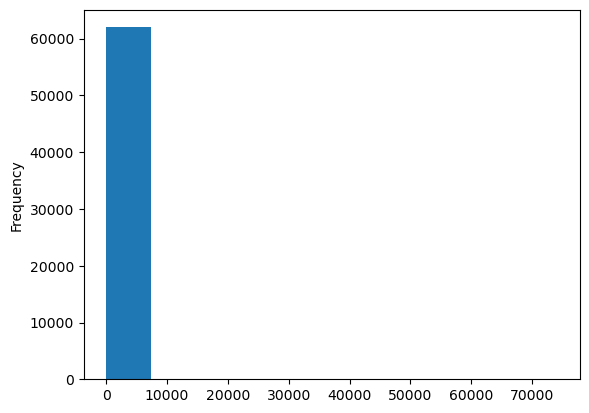

In [123]:
df.price.plot.hist() # histogram

If the code worked properly you should have just created a standard
[histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html)
plot (if you can’t see one, ask for help). However, a basic problem here
may be the range of the data: if your maximum price is much more than
£5,000 then you’ll find the majority of your data plotted in one bar,
which isn’t very helpful.

You can filter the data *and* pass in some simple options to improve the
plotting:

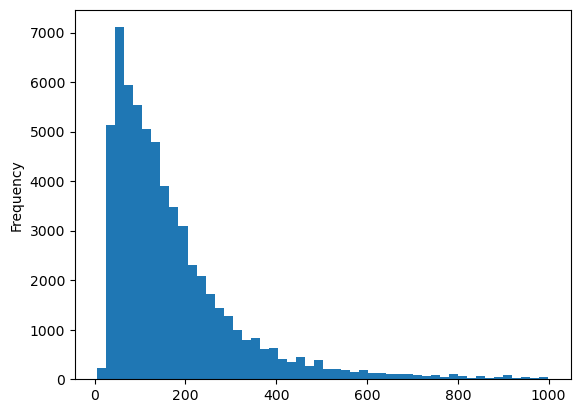

In [124]:
# Notice the ';' here to suppress `<AxesSubplot...>`
# That information doesn't *always* appear, but whenever
# you have unwanted textual output above your plot just
# add a ';' on the end of the line of code!
df[df.price < 1000].price.plot.hist(bins=50); 

#### 11.0.2 KDE Plots

> **Difficulty: Low**

Similarly, we can produce a [Kernel Density Estimate
plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html).
This time, instead of dropping data just before calling `plot` we’re
going to modify the *limits* of the x-axis using `xlim`:

##### 11.0.2.1 Question

Look for information about using `xlim`:

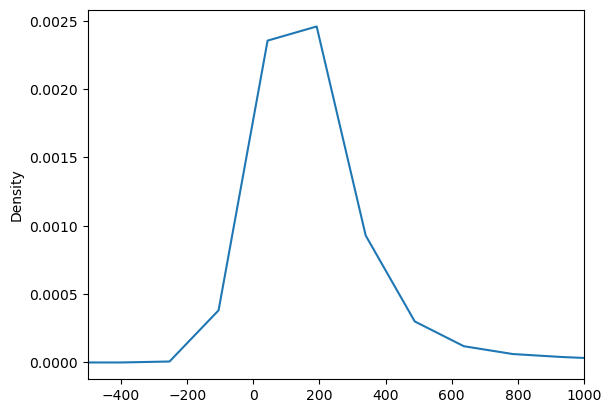

In [131]:
df.price.plot.kde(xlim=(-500, 1000)); #kernel density estimate plot

Kind of handy, no? These aren’t the *best* looking plots, but they are
all being generated on-the-fly for you by pandas with no more than a
cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all
just method calls, many of them take optional parameters to change the
colour, the notation (scientific or not), and other options. For
example, many of the documentation pages linked to above are rather
brief, but include a link to [the general options that can be applied to
all
`Series.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)
calls.

This is why we like pandas: it allows us to be *constructively lazy*. We
don’t need to know *how* a draw a KDE plot (though it always helps if
you don’t see what you expected), we just need to know that pandas
provides a method that will do it for you. And *that* is why it’s always
worth having a [look at the
documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

#### 11.0.3 A Slight Case of Over-Plotting

Generally, Jupyter is clever enough to overlay plots one on top of the
other if you call them all in the same cell. We’ll see ways to gain more
control later, but this is still a good start! Note that here we also
need to get rid of the `-inf` values from rows that had a price of £0.

> **Bug Alert**
>
> The more we use pandas to sort and filter data the more you will start
> to see a `SettingWithCopyWarning`. This happens because of an
> interaction between how Pandas works and how Python works: when you
> are working with a very large data set you don’t want to make a ‘deep
> copy’ of the data structure every time you make a change to the data.
> Instead, you get a ‘view’ into the data using a reference, which is a
> just a lightweight shortcut. So what happens when you try to modify
> that lightweight copy? Well, if you want to drop rows or columns then
> you either want to make a `copy()` at that point, or you will have to
> accept the warning *and* the computational risks that go with it.

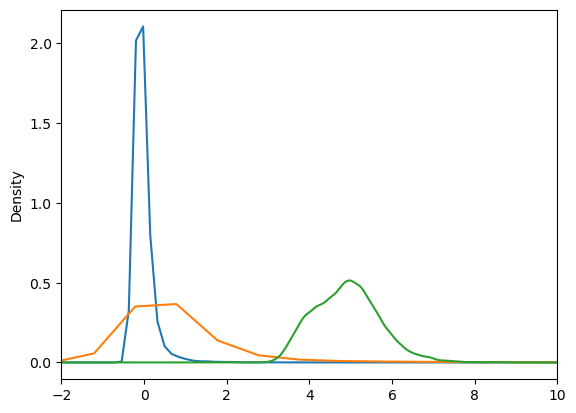

In [129]:
# Calling copy() ensures the index is updated
# and note that all subsequent plots will have
# these £0 rows removed!
df = df[df.price > 0].copy() 
df.z.plot.kde(xlim=[-2, 10])
df.iqs.plot.kde(xlim=[-2, 10])
df.lnprice.plot.kde();

#### 11.0.4 Boxplots

> **Difficulty: Low**

A standard
[boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html):

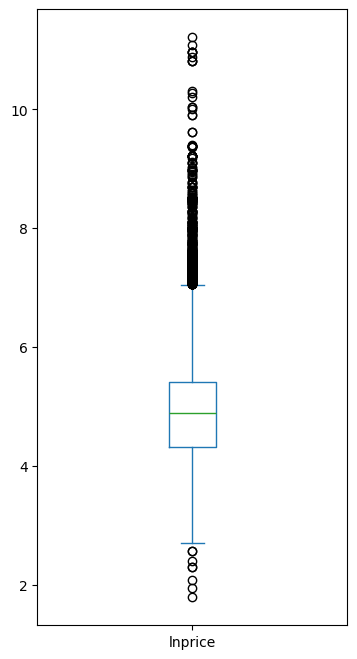

In [132]:
df.lnprice.plot.box(figsize=(4, 8));

#### 11.0.5 Scatterplots

> **Difficulty: Low**

We can also plot two variables in a [scatter
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter)
by applying a plot method to the `DataFrame` (not an individual
`Series`):

<Axes: xlabel='longitude', ylabel='latitude'>

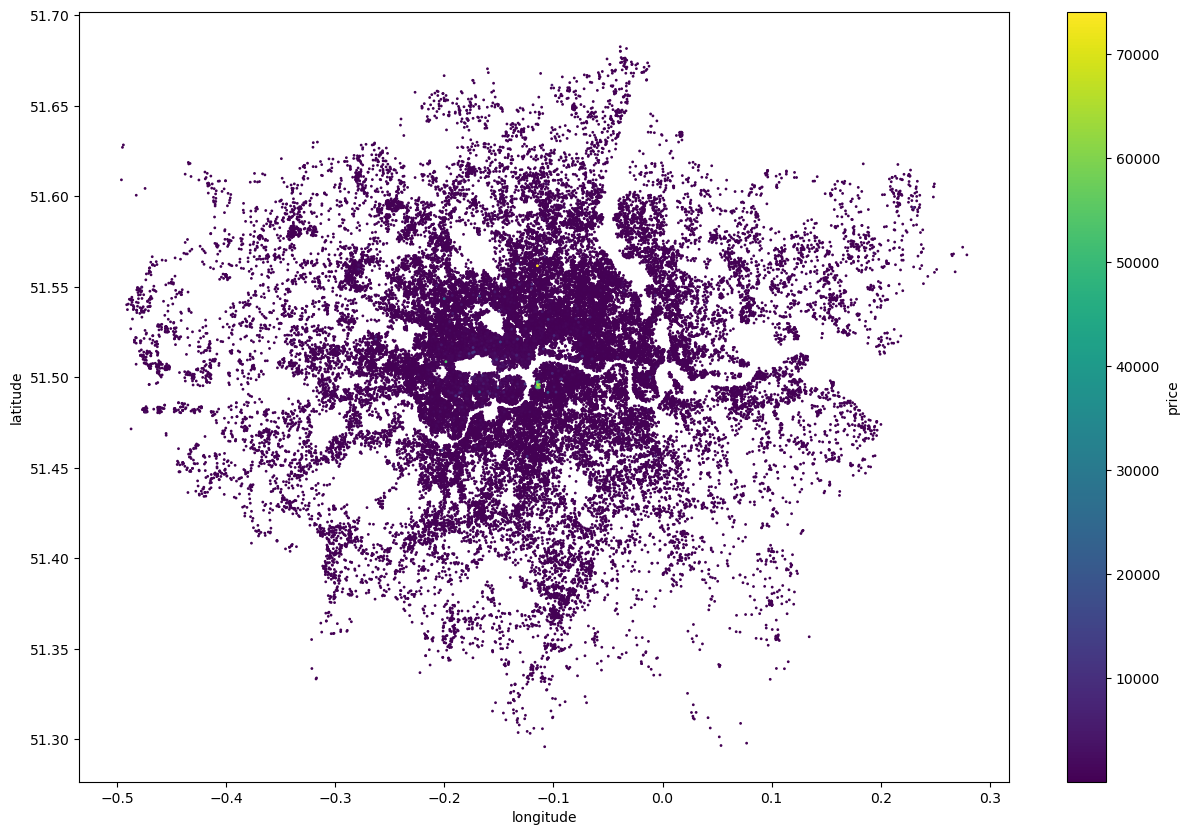

In [146]:
df_sorted = df.sort_values('price')
df_sorted.plot.scatter(x='longitude', y='latitude', c='price', s=1, cmap='viridis', figsize=(15,10))

Note how the code above has the form `DataFrame.plot.<plot type>`, not
`DataFrame.Series.plot.<plot type>` as in the prior plots. Think about
why this then means we need the `x` and `y` arguments.

Looking at the plot produced, it’s hard to see where the high values
are, so we might want to think about ways that we could make it easier
to spot the big numbers… We could, for instance, also vary the size of
the point in a plot by some variable, but why does the following not
really work?

<Axes: xlabel='longitude', ylabel='latitude'>

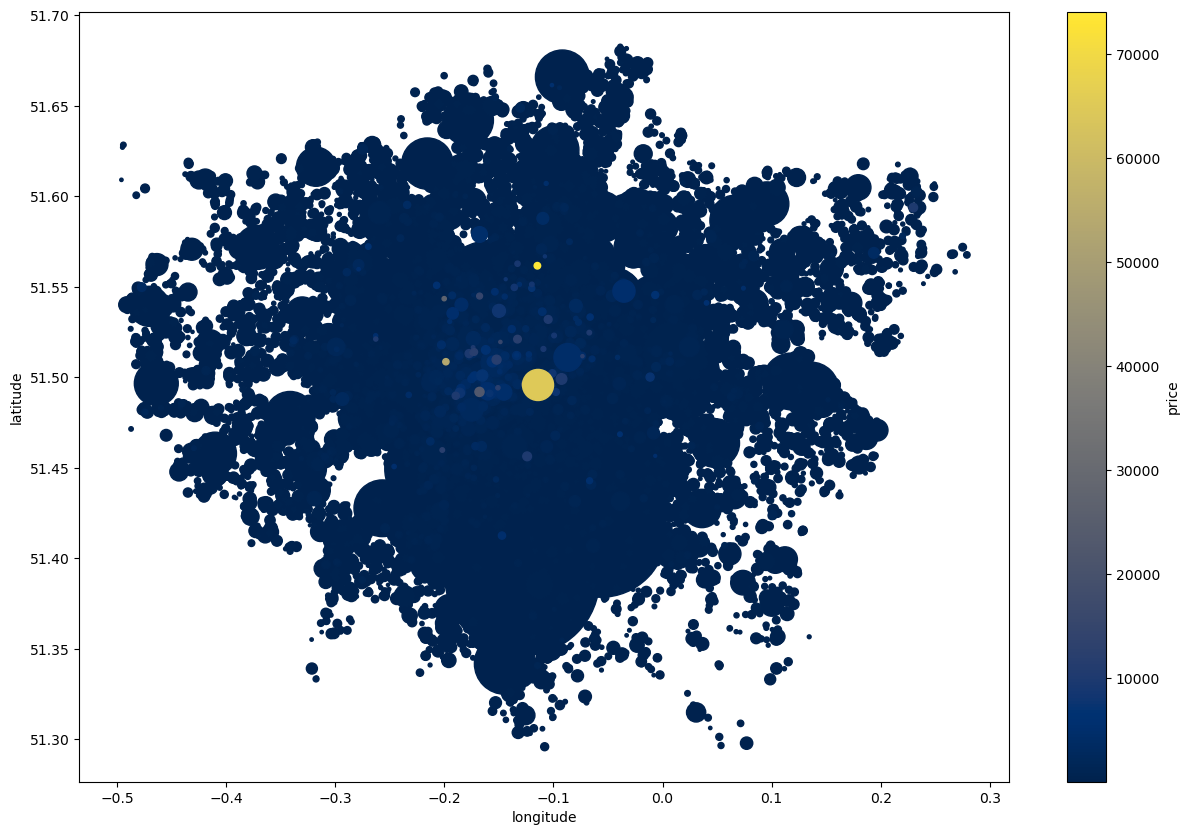

In [149]:
df_sorted.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='cividis', figsize=(15,10))

<Axes: xlabel='longitude', ylabel='latitude'>

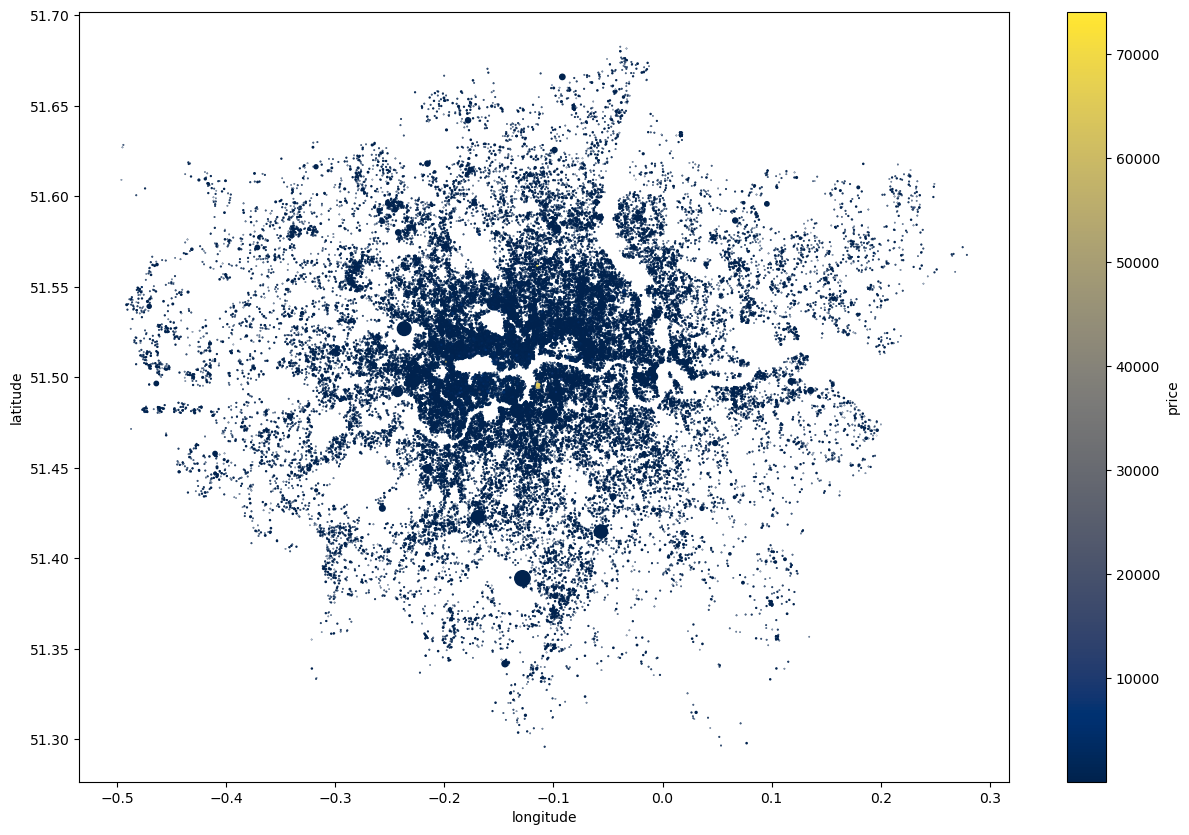

In [153]:
df_sorted.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min())*0.01, cmap='cividis', figsize=(15,10))

And we can plot subsets of our data without creating a new object. See
if you can work out what the following code is doing that is different
from the last plot:

<Axes: xlabel='longitude', ylabel='latitude'>

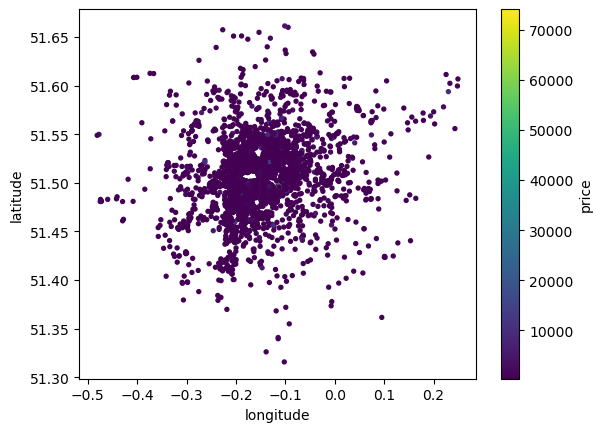

In [137]:
df[df.price > df.price.quantile(0.90)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)

#### 11.0.6 Hex Bin Plots

> **Difficulty: Low**

And pandas allows us to create ‘less standard’ plots, like a [hex bin
plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

<Axes: title={'center': 'Airbnb prices'}, xlabel='longitude', ylabel='latitude'>

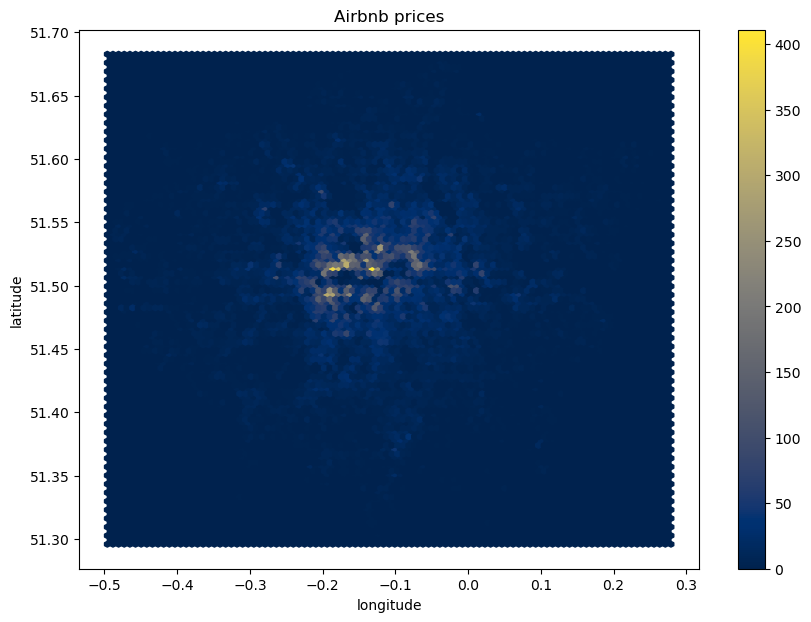

In [162]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=100, figsize=(10,7), cmap='cividis', title='Airbnb prices')

That’s just a taste of what the basic plotting functionality of pandas
can do. Feel free to explore more yourself and we’ll also see [the
seaborn package](http://seaborn.pydata.org/index.html) later.

## 12. Credits!

##### 12.0.0.1 License

These teaching materials are licensed under a mix of [The MIT
License](https://opensource.org/licenses/mit-license.php) and the
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0
license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

##### 12.0.0.2 Acknowledgements:

Supported by the [Royal Geographical
Society](https://www.rgs.org/HomePage.htm) (with the Institute of
British Geographers) with a Ray Y Gildea Jr Award.

##### 12.0.0.3 Potential Dependencies:

This notebook may depend on the following libraries: pandas, matplotlib